<a href="https://colab.research.google.com/github/AldiAlfatih/Program-Sistem-Cerdas-PTC/blob/main/Sistem_Prediksi_Kualitas_Panen_Hidroponik_Selada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn
!pip install tensorflow
!pip show tensorflow
# !pip uninstall scikit-learn
!pip install scikit-learn==1.4.2
!pip install scikeras

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [2]:
import pandas as pd
import tensorflow as tf
import sklearn
import scikeras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasClassifier
from scipy.stats import randint
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Vinzzztty/playground-data-analyst/main/Machine%20Learning%20Terapan/2.%20Sentiment%20Analysis/dataset/dataset_selada.csv")

In [4]:
df.head()

,Jam,temperature,humidity,light,pH,EC,TDS,WaterTemp,Label,Pattern
0,15.15,25.5,67,17660,6.4,855,427,29.7,Selada,1
1,17.22,26.9,80,86930,6.7,929,464,27.0,Selada,1
2,7.33,25.7,77,23320,6.1,900,449,25.4,Selada,1
3,9.18,26.6,69,32280,6.7,887,443,26.1,Selada,1
4,10.39,25.8,65,41750,6.6,967,482,25.7,Selada,1


In [5]:
# Memilih fitur
fitur = ['temperature', 'humidity', 'TDS', 'WaterTemp']
X = df[fitur]

In [6]:
X.head(10)

,temperature,humidity,TDS,WaterTemp
0,25.5,67,427,29.7
1,26.9,80,464,27.0
2,25.7,77,449,25.4
3,26.6,69,443,26.1
4,25.8,65,482,25.7
5,27.2,59,482,26.6
6,27.2,64,499,26.7
7,26.3,71,499,26.5
8,25.3,87,490,26.5
9,25.6,83,463,26.1


In [7]:
# Menentukan jumlah cluster
n_clusters = 5

In [8]:
# Melakukan clustering dengan K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Kategori'] = kmeans.fit_predict(X)

In [9]:
# Membagi data
X = df[fitur]
y = df['Kategori']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Normalisasi Data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print("TensorFlow version:", tf.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("SciKeras version:", scikeras.__version__)

TensorFlow version: 2.17.1
Scikit-learn version: 1.4.2
SciKeras version: 0.13.0


In [20]:
def create_lstm_model(units=60, dropout_rate=0.3, optimizer='adam'):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(n_clusters, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Buat model LSTM
model_lstm = create_lstm_model(
    units=60,
    dropout_rate=0.3,
    optimizer='rmsprop'
)

# Latih model LSTM
model_lstm.fit(X_train_scaled, y_train, epochs=10, batch_size=64, verbose=2)

# Evaluasi model LSTM pada data uji
loss, accuracy = model_lstm.evaluate(X_test_scaled, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 - 1s - 12ms/step - accuracy: 0.4733 - loss: 1.2722
Epoch 2/10
63/63 - 0s - 2ms/step - accuracy: 0.7992 - loss: 0.8688
Epoch 3/10
63/63 - 0s - 2ms/step - accuracy: 0.8584 - loss: 0.5782
Epoch 4/10
63/63 - 0s - 2ms/step - accuracy: 0.8876 - loss: 0.3888
Epoch 5/10
63/63 - 0s - 2ms/step - accuracy: 0.9471 - loss: 0.2769
Epoch 6/10
63/63 - 0s - 2ms/step - accuracy: 0.9663 - loss: 0.2097
Epoch 7/10
63/63 - 0s - 2ms/step - accuracy: 0.9755 - loss: 0.1657
Epoch 8/10
63/63 - 0s - 2ms/step - accuracy: 0.9785 - loss: 0.1348
Epoch 9/10
63/63 - 0s - 2ms/step - accuracy: 0.9813 - loss: 0.1144
Epoch 10/10
63/63 - 0s - 2ms/step - accuracy: 0.9825 - loss: 0.0991
Loss: 0.09503255039453506
Accuracy: 0.9870129823684692


In [21]:
# Evaluasi model LSTM pada data uji
loss, accuracy = model_lstm.evaluate(X_test_scaled, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Menampilkan hasil prediksi pada data latih (LSTM)
y_pred_train_lstm = np.argmax(model_lstm.predict(X_train_scaled), axis=1)
print("Hasil prediksi pada data latih (LSTM):")
print(y_pred_train_lstm)

# Menampilkan hasil prediksi pada data uji (LSTM)
y_pred_lstm = np.argmax(model_lstm.predict(X_test_scaled), axis=1)
print("Hasil prediksi pada data uji (LSTM):")
print(y_pred_lstm)

# Evaluasi model LSTM pada data uji
print("Evaluasi Model LSTM:")
print(classification_report(y_test, y_pred_lstm))

Loss: 0.09503255039453506
Accuracy: 0.9870129823684692
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Hasil prediksi pada data latih (LSTM):
[4 4 0 ... 0 4 0]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Hasil prediksi pada data uji (LSTM):
[4 2 1 ... 0 1 0]
Evaluasi Model LSTM:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       280
           1       0.99      0.99      0.99       165
           2       0.98      1.00      0.99       437
           3       0.00      0.00      0.00         1
           4       0.99      0.92      0.96       118

    accuracy                           0.99      1001
   macro avg       0.79      0.78      0.79      1001
weighted avg       0.99      0.99      0.99      1001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
def create_ann_model(neurons_1=128, neurons_2=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(neurons_1, activation=activation, input_dim=X_train_scaled.shape[1]))
    model.add(Dense(neurons_2, activation=activation))
    model.add(Dense(n_clusters, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Buat model ANN dengan parameter yang Anda inginkan
model_ann = create_ann_model(
    neurons_1=200,
    neurons_2=100,
    activation='sigmoid',
    optimizer='rmsprop'
)

# Latih model ANN
model_ann.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluasi model ANN pada data uji
loss, accuracy = model_ann.evaluate(X_test_scaled, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


126/126 - 1s - 7ms/step - accuracy: 0.4093 - loss: 1.2952
Epoch 2/10
126/126 - 0s - 2ms/step - accuracy: 0.4141 - loss: 1.2662
Epoch 3/10
126/126 - 0s - 2ms/step - accuracy: 0.4341 - loss: 1.2084
Epoch 4/10
126/126 - 0s - 2ms/step - accuracy: 0.5225 - loss: 1.0936
Epoch 5/10
126/126 - 0s - 2ms/step - accuracy: 0.6918 - loss: 0.9258
Epoch 6/10
126/126 - 0s - 2ms/step - accuracy: 0.8222 - loss: 0.7352
Epoch 7/10
126/126 - 0s - 2ms/step - accuracy: 0.8551 - loss: 0.5559
Epoch 8/10
126/126 - 0s - 2ms/step - accuracy: 0.8754 - loss: 0.4286
Epoch 9/10
126/126 - 0s - 2ms/step - accuracy: 0.9243 - loss: 0.3317
Epoch 10/10
126/126 - 0s - 2ms/step - accuracy: 0.9563 - loss: 0.2672
Loss: 0.23605109751224518
Accuracy: 0.9850149750709534


In [23]:
# Evaluasi model ANN pada data uji
loss, accuracy = model_ann.evaluate(X_test_scaled, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

# Menampilkan hasil prediksi pada data latih (ANN)
y_pred_train_ann = np.argmax(model_ann.predict(X_train_scaled), axis=1)
print("Hasil prediksi pada data latih (ANN):")
print(y_pred_train_ann)

# Menampilkan hasil prediksi pada data uji (ANN)
y_pred_ann = np.argmax(model_ann.predict(X_test_scaled), axis=1)
print("Hasil prediksi pada data uji (ANN):")
print(y_pred_ann)

# Evaluasi model ANN pada data uji
print("Evaluasi Model ANN:")
print(classification_report(y_test, y_pred_ann))

Loss: 0.23605109751224518
Accuracy: 0.9850149750709534
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Hasil prediksi pada data latih (ANN):
[4 4 0 ... 0 4 0]
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Hasil prediksi pada data uji (ANN):
[4 2 1 ... 0 1 0]
Evaluasi Model ANN:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       1.00      1.00      1.00       165
           2       0.97      1.00      0.98       437
           3       0.00      0.00      0.00         1
           4       1.00      0.88      0.94       118

    accuracy                           0.99      1001
   macro avg       0.79      0.78      0.78      1001
weighted avg       0.98      0.99      0.98      1001



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


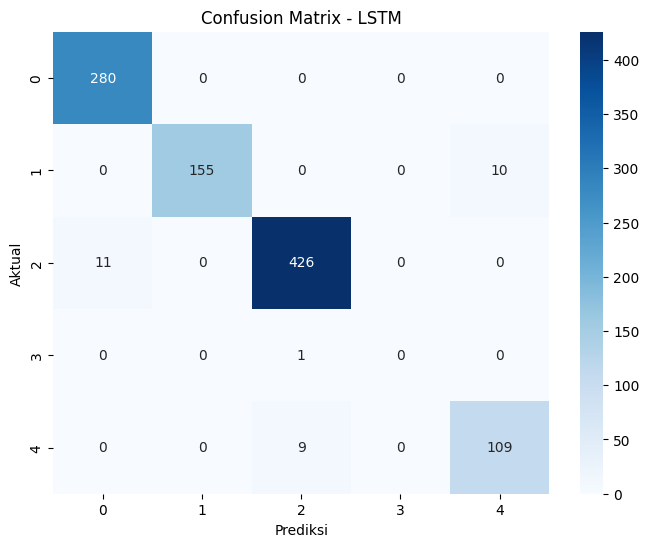

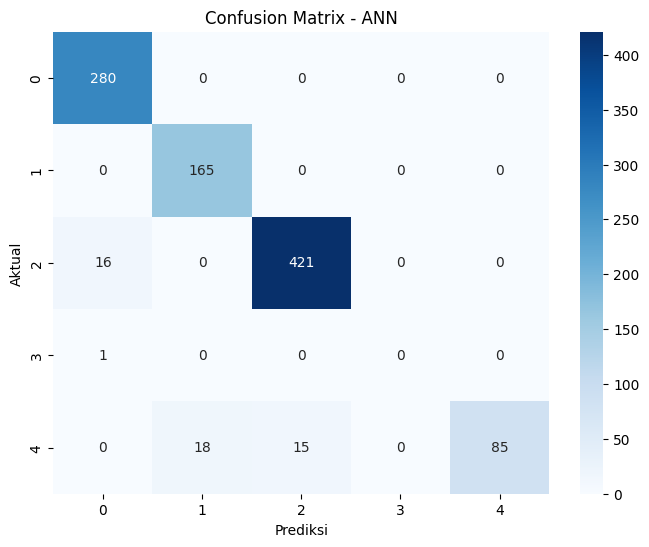

In [16]:
# Confusion matrix untuk model LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

# Confusion matrix untuk model ANN
cm_ann = confusion_matrix(y_test, y_pred_ann)

# Visualisasi confusion matrix LSTM
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LSTM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Visualisasi confusion matrix ANN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - ANN')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [17]:
import tensorflow as tf
model_ann.save('best_model_ann.h5')
model = tf.keras.models.load_model('best_model_ann.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tfliteModel = converter.convert()

with open('best_model_ann.tflite', 'wb') as f:
    f.write(tfliteModel)

Saved artifact at '/tmp/tmp_y1gu2uc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  135443533975920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135443533980848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135443533986832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135443534090256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135443534094304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135443534095184: TensorSpec(shape=(), dtype=tf.resource, name=None)
